In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline 
# It will make plot output appear in the notebook as well as save in the notebook, hence next time when you open, you would be able to see the plot, without re running
plt.rc("font", size=14)
from sklearn.preprocessing import LabelEncoder # Just in case the output variable is in string form
lb = LabelEncoder() # Also if independent variables are in string format, encode those ones as well
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import warnings # Used to ignore warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier() # Place the type bar in the parenthesis of the function and press Shift and double tab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials\

from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data['Revenue'] = lb.fit_transform(data['Revenue'])
data['Month'] = lb.fit_transform(data['Month'])
data['VisitorType'] = lb.fit_transform(data['VisitorType'])

In [4]:
y = data['Revenue']
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [5]:
x = data.drop(columns = ['Revenue'], inplace = True)

In [6]:
x_train, x_test, y_train, y_test= train_test_split(data,y,test_size=0.3)

In [7]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(x_train)
xtest = sc_x.transform(x_test)


In [8]:
rf_classifier=RandomForestClassifier(n_estimators = 10).fit(x_train,y_train)
prediction=rf_classifier.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[3035   95]
 [ 278  291]]
0.8991619356582861
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3130
           1       0.75      0.51      0.61       569

    accuracy                           0.90      3699
   macro avg       0.83      0.74      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [10]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[3029  101]
 [ 233  336]]
0.9097053257637199
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3130
           1       0.77      0.59      0.67       569

    accuracy                           0.91      3699
   macro avg       0.85      0.78      0.81      3699
weighted avg       0.90      0.91      0.90      3699



In [11]:
model=RandomForestClassifier(n_estimators=3000,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[3028  102]
 [ 240  329]]
0.9075425790754258
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3130
           1       0.76      0.58      0.66       569

    accuracy                           0.91      3699
   macro avg       0.84      0.77      0.80      3699
weighted avg       0.90      0.91      0.90      3699



In [12]:
model.feature_importances_

array([0.03013101, 0.04037125, 0.00764284, 0.01369119, 0.05894116,
       0.07448713, 0.05112479, 0.0878845 , 0.49366562, 0.0045284 ,
       0.07115254, 0.00705729, 0.00640214, 0.01642748, 0.01803818,
       0.01410994, 0.00434453])

<BarContainer object of 17 artists>

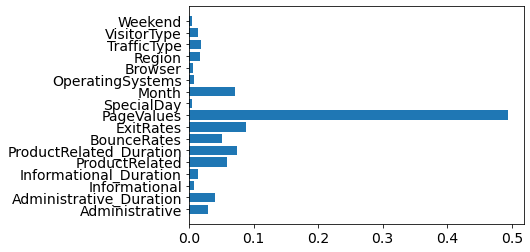

In [21]:
plt.barh(data.columns, model.feature_importances_)